## Introduction to Reaction Time (RT) Data Analysis

If this is your first time programming, you will likely need to install the following:

1. A code editor. I recommend [VSCode](https://code.visualstudio.com/)
2. The latest version of [Python](https://www.python.org/downloads/). There are other programming languages we can use, but Python is the most common in science and easy to pick up.
3. Packages:
   1. [matplotlib](https://matplotlib.org/)
   2. [scipy](https://docs.scipy.org)
   3. [numpy](https://numpy.org)
   4. [pandas](https://pandas.pydata.org)
   5. [seaborn](https://seaborn.pydata.org)

Run the following cell to check the version of Python you are running, and the versions of the installed packages above (and, if not installed already, install them):

In [4]:
import sys 
from subprocess import check_output

print(f"Python version: {sys.version}\n\nInstalled packages:")
print(check_output(['pip', 'freeze']).decode('ascii'))

Python version: 3.10.1 (tags/v3.10.1:2cd268a, Dec  6 2021, 19:10:37) [MSC v.1929 64 bit (AMD64)]

Installed packages:
asttokens==2.4.1
colorama==0.4.6
comm==0.1.4
contourpy==1.2.0
cycler==0.12.1
debugpy==1.8.0
decorator==5.1.1
exceptiongroup==1.1.3
executing==2.0.1
fonttools==4.44.0
ipykernel==6.26.0
ipython==8.17.2
jedi==0.19.1
jupyter_client==8.5.0
jupyter_core==5.5.0
kiwisolver==1.4.5
matplotlib==3.8.1
matplotlib-inline==0.1.6
nest-asyncio==1.5.8
numpy==1.26.1
packaging==23.2
pandas==2.1.2
parso==0.8.3
Pillow==10.1.0
platformdirs==3.11.0
prompt-toolkit==3.0.39
psutil==5.9.6
pure-eval==0.2.2
Pygments==2.16.1
pyparsing==3.1.1
python-dateutil==2.8.2
pytz==2023.3.post1
pywin32==306
pyzmq==25.1.1
scipy==1.11.3
seaborn==0.13.0
six==1.16.0
stack-data==0.6.3
tornado==6.3.3
traitlets==5.13.0
tzdata==2023.3
wcwidth==0.2.9



In [1]:
from pathlib import Path 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data = pd.read_csv(Path.cwd().parent / 'resources/reaction_time/dy_elapsed_vs_actual.csv', header=None, index_col=0).T
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\delbe\\Documents\\CodeRepositories\\ScienceClub\\resources\\reaction_time\\dy_elapsed_vs_actual.csv'

In [ ]:
plt.style.use('default')

Text(0.5, 0, 'Actual Speed (1/s)')

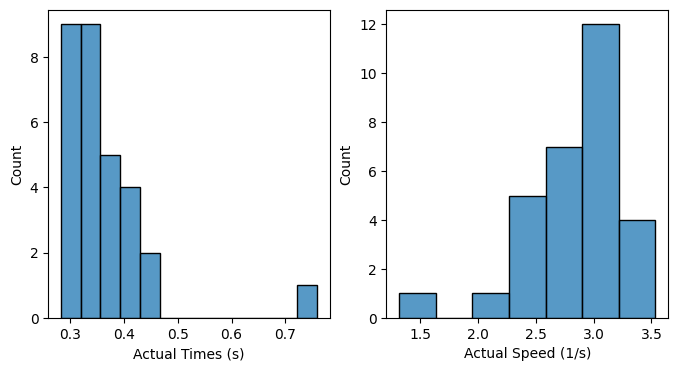

In [ ]:
_, axs = plt.subplots(1, 2, figsize=(8, 4))

sns.histplot(data.iloc[:, 1], bins='auto', ax=axs[0])
sns.histplot(1/data.iloc[:, 1], bins='auto', ax=axs[1])

axs[0].set_xlabel('Actual Times (s)')
axs[1].set_xlabel('Actual Speed (1/s)')

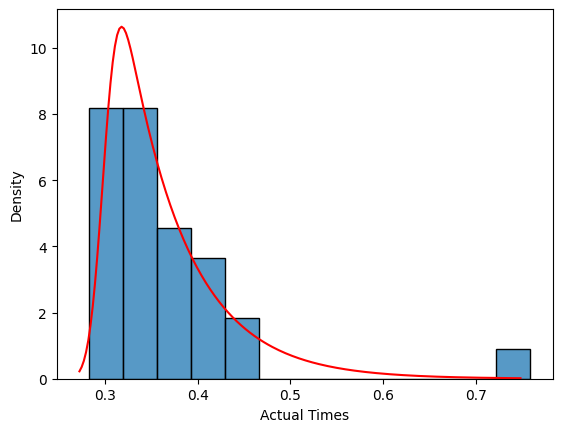

In [ ]:
import numpy as np 
from scipy.stats import exponnorm

rv = exponnorm(*exponnorm.fit(data.iloc[:,1]))
x = np.linspace(rv.ppf(0.001), rv.ppf(0.999), 200)

ax = sns.histplot(data.iloc[:,1], bins='auto', stat='density')
ax.plot(x, rv.pdf(x), 'r-')

c:\Users\delbe\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\Users\delbe\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Text(0.5, 0, 'Actual Speeds (1/s)')

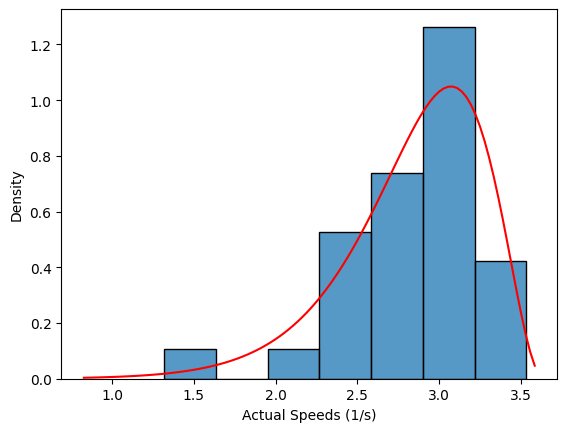

In [ ]:
from scipy.stats import beta

data['Actual Speeds'] = 1/data.iloc[:,1]

rv_beta = beta(*beta.fit(data['Actual Speeds']))
x = np.linspace(rv_beta.ppf(0.001), rv_beta.ppf(0.999), 100)

ax = sns.histplot(data['Actual Speeds'], bins='auto', stat='density')
ax.plot(x, rv_beta.pdf(x), 'r-')
ax.set_xlabel("Actual Speeds (1/s)")